In [27]:
import numpy as np
import math
import imageio
import matplotlib.pyplot as plt

In [94]:
def inv_fourier_filter(filt):
    f = np.fft.ifft2(filt)
    f_shift = np.fft.ifftshift(f)
    return np.abs(f_shift).real

In [122]:
def ideal(M, N, Do):
    d = lambda u, v: math.sqrt(math.pow((u-M/2), 2) + math.pow((v-N/2), 2))
    h = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            h[u, v] = 1 if d(u, v) <= Do else 0
    return h

def bandpass_ideal(M, N, tupDoDi):
    return (ideal(M, N, tupDoDi[1]) - ideal(M, N, tupDoDi[0]))

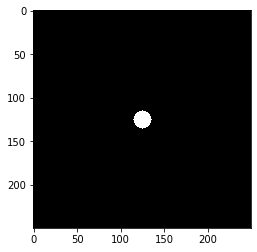

In [96]:
plt.imshow(ideal(250,250,10), cmap='gray')

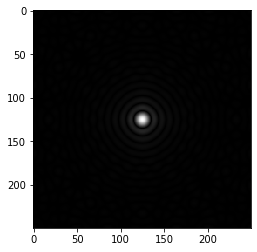

In [97]:
plt.imshow(inv_fourier_filter(ideal(250,250,15)), cmap='gray')

In [127]:
def butter(M, N, n, Do):
    d = lambda u, v: math.sqrt(math.pow((u-M/2), 2) + math.pow((v-N/2), 2))
    h = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            h[u, v] = 1 / (1 + math.pow((d(u, v)/Do), n))
    return h

def bandpass_butter(M, N, n, tupDoDi):
    return butter(M,N,n,tupDoDi[1]) - butter(M,N,n,tupDoDi[0])

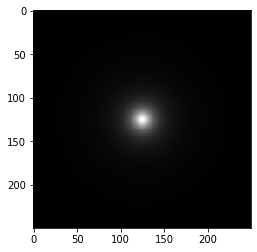

In [99]:
plt.imshow(butter(250,250,2,10), cmap='gray')

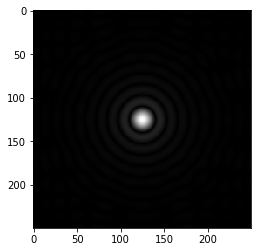

In [100]:
plt.imshow(inv_fourier_filter(butter(250,250,80,10)), cmap='gray')

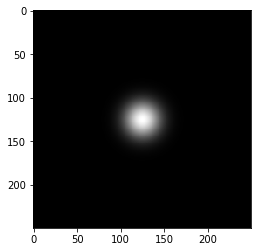

In [101]:
def gauss(M, N, Do):
    d = lambda u, v: math.sqrt(math.pow((u-M/2), 2) + math.pow((v-N/2), 2))
    h = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            h[u, v] = np.exp( -math.pow(d(u, v), 2) / math.pow((2 * Do), 2) )
    return h

def bandpass_gauss(M, N, tupDoDi):
    return (gauss(M,N,tupDoDi[0]), gauss(M,N,tupDoDi[1]))

plt.imshow(gauss(250,250,10), cmap='gray')

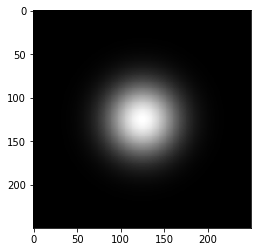

In [103]:
plt.imshow(inv_fourier_filter(gauss(250,250,1)), cmap='gray')

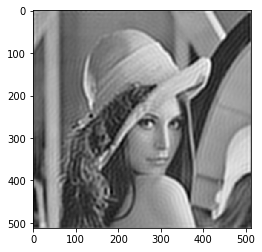

In [104]:
im = imageio.imread("atividades_em_sala/lena.png", as_gray=True)

f = np.fft.fft2(im)
f_shift = np.fft.fftshift(f)

M, N = f_shift.shape
Do = 50

conv = f_shift * ideal(M, N, Do)

i_f = np.fft.ifftshift(conv)
i_fshift = np.fft.ifft2(i_f).real

plt.imshow(i_fshift, cmap='gray')

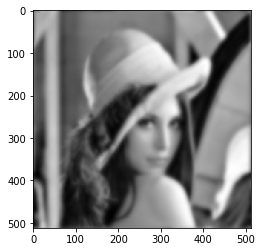

In [114]:
fb = np.fft.fft2(im)
fb_shift = np.fft.fftshift(fb)

Mb, Nb = fb_shift.shape
Dob = 20
nb = 3

convb = fb_shift * butter(Mb, Nb, nb, Dob)

i_fb = np.fft.ifftshift(convb)
i_fbshift = np.fft.ifft2(i_fb).real

plt.imshow(i_fbshift, cmap='gray')

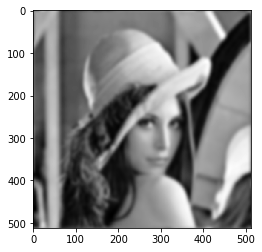

In [116]:
fg = np.fft.fft2(im)
fg_shift = np.fft.fftshift(fg)

Mg, Ng = fg_shift.shape
Dog = 15

convg = fg_shift * gauss(M, N, Dog)

i_fg = np.fft.ifftshift(convg)
i_fgshift = np.fft.ifft2(i_fg).real

plt.imshow(i_fgshift, cmap='gray')

Band pass

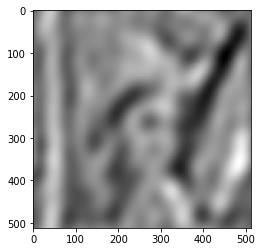

In [126]:
f = np.fft.fft2(im)
f_shift = np.fft.fftshift(f)

M, N = f_shift.shape
Do = 1
Di = 9

band = bandpass_ideal(M, N, (Do, Di))
conv = (f_shift * band)

i_f = np.fft.ifftshift(conv)
i_fshift = np.fft.ifft2(i_f).real

plt.imshow(i_fshift, cmap='gray')

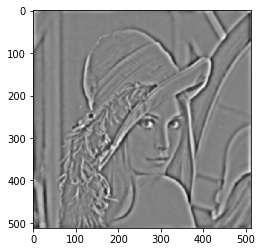

In [128]:
fb = np.fft.fft2(im)
fb_shift = np.fft.fftshift(fb)

Mb, Nb = fb_shift.shape
Dob = 20
Dib = 50
nb = 3

convb = fb_shift * bandpass_butter(Mb, Nb, nb, (Dob, Dib))

i_fb = np.fft.ifftshift(convb)
i_fbshift = np.fft.ifft2(i_fb).real

plt.imshow(i_fbshift, cmap='gray')